In [8]:
from astropy.table import Table
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [51]:
hdul = fits.open('maxima.fits')

In [10]:
fits.info('maxima.fits')

Filename: maxima.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  maximap       1 BinTableHDU     19   1R x 4C   [5972E, 5972E, 5972E, 35664784E]   


In [78]:
hdu = fits.PrimaryHDU()
hdu.header
# The Primary HDU does not have data

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [83]:
hdr = hdul[0].header
print(hdr)
#for i in range(len(hdr)):
#    print(hdr[i])

hdr.comments['EXTEND']

SIMPLE  =                    T /Written by IDL:  Thu Feb  7 18:35:08 2002       BITPIX  =                    8 /                                                NAXIS   =                    0 /                                                EXTEND  =                    T /File contains extensions                        DATE    = '2002-02-08'         /                                                END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

'File contains extensions'

In [86]:
hdr2 = hdul[1].header
#print(hdr2)
for i in range(len(hdr2)):
    print(hdr2[i])

BINTABLE
8
2
142730800
1
0
1
4
2002-02-08
maximap
5972E
PIXEL RA [DEGREE]
5972E
PIXEL DEC [DEGREE]
5972E
MAP [UK]
35664784E
NOISE [UK^2]
(5972,5972)


In [52]:
data = hdul[1].data[0]

In [53]:
data0 = data[0]
data1 = data[1]
data2 = data[2]
data3 = data[3]

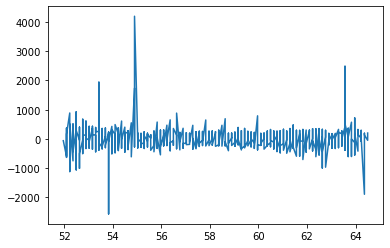

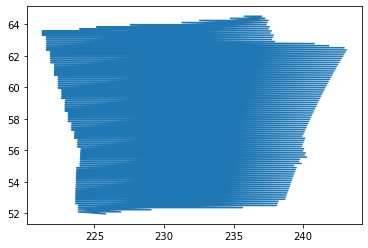

In [109]:
plt.figure()
plt.plot(data1,data2)
plt.figure()
plt.plot(data0,data1)

In [16]:
events = Table.read('maxima.fits', hdu=1)

In [23]:
print(events.columns)
print(events['MAP [UK]'].unit)

<TableColumns names=('PIXEL RA [DEGREE]','PIXEL DEC [DEGREE]','MAP [UK]','NOISE [UK^2]')>
None


In [115]:
# Print data corresponding to each column name
print(events['PIXEL RA [DEGREE]'])
print(events['PIXEL DEC [DEGREE]'])
print(events['MAP [UK]'])
print(events['NOISE [UK^2]'])

print(events['MAP [UK]'].unit) # No units listed for data, but UK stands for micro Kelvins

PIXEL RA [DEGREE] [5972]
------------------------
         225.78 .. 237.0
PIXEL DEC [DEGREE] [5972]
-------------------------
           51.967 .. 64.5
    MAP [UK] [5972]    
-----------------------
-60.087994 .. 201.96841
NOISE [UK^2] [5972,5972]
------------------------
  128133.23 .. 11818.431
None


In [87]:
#prints out all 5000+ data points for data2, corresponding to 'MAP [UK]'
#for i in range(len(data2)):
#    print(data2[i])

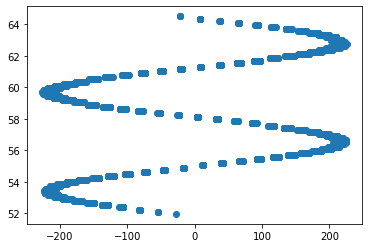

In [112]:
# Notes taken from https://lambda.gsfc.nasa.gov/product/suborbit/maxima_skymap.cfm
y = data1
x = []
for i in range(len(data0)):
    x.append((data0[i]-14.8)*np.cos(data1[i]))

plt.scatter(x,y)